In [ ]:
!pip install xgboost
!pip install catboost

##Importing dataset and Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display
from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as sml
from sklearn.impute import KNNImputer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
import xgboost as xgb
from xgboost import plot_importance
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

### Dataset Details

Dataset Name: Diabetes 130-US hospitals for years 1999-2008 Data Set

Dataset Size - 101766

Number of columns - 50

Source - [URL](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

Research Question - Can data mining models predict the risk of hospital readmission for diabetic patients within 30 days of discharge, based on various patient attributes and healthcare utilization patterns?

Related Papers- [Paper 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8323261/)

### Attribute description

Encounter ID Unique identifier of an encounter

Patient number Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight Weight in pounds

Admission type Integer identifier corresponding to 9 distinct values, for
example, emergency, urgent, elective, newborn, and not available

Discharge disposition Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital Integer number of days between admission and discharge

Payer code Integer identifier corresponding to 23 distinct values, for example,

Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures Number of lab tests performed during the encounter

Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications Number of distinct generic names administered during the encounter

Number of outpatient visits Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1 The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2 Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3 Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses Number of diagnoses entered to the system 0%

Glucose serum test result Indicates the range of the result or if the test was
not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [ ]:
# df = pd.read_csv('drive/MyDrive/CA683: Data Analytics and Data Mining/Assignment/Dataset/diabetic_data.csv')
# discharge_disposition = pd.read_csv("/content/drive/MyDrive/CA683: Data Analytics and Data Mining/Assignment/Dataset/Discharge_disposition_table.csv")
# admission_type = pd.read_csv("/content/drive/MyDrive/CA683: Data Analytics and Data Mining/Assignment/Dataset/Admission_table.csv")

df = pd.read_csv('C:/Users/shikh/Downloads/diabetic_data.csv')
discharge_disposition = pd.read_csv("C:/Users/shikh/Downloads/Discharge_disposition_table.csv")
admission_type = pd.read_csv("C:/Users/shikh/Downloads/Admission_table.csv")

## Data Exploration

In [ ]:
print("Number of columns : ",len(df.columns))
print("Number of rows : ",len(df))

Number of columns :  50
Number of rows :  101766


In [ ]:
for col in df.columns:
    if df[col].dtype == object:

         print(col,(df[col][df[col] == '?'].count()/len(df))*100)

race 2.2335554114340743
gender 0.0
age 0.0
weight 96.85847925633315
payer_code 39.5574160328597
medical_specialty 49.08220820313268
diag_1 0.02063557573256294
diag_2 0.3517874339170253
diag_3 1.398305917497003
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


In [ ]:
def DatasetInfo(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

Shape of the dataset: (101766, 50)


Sample from Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
74309,221098680,78771078,?,Female,[70-80),[50-75),2,6,1,13,UN,Cardiology,86,6,45,0,0,0,396,428,599,9,nan,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
89808,290874558,60156954,AfricanAmerican,Male,[40-50),?,1,1,7,3,BC,?,15,5,16,0,0,0,411,401,414,8,nan,nan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
54836,159085416,102061809,Caucasian,Female,[80-90),?,3,1,1,4,HM,InternalMedicine,56,5,12,0,0,2,997,518,507,9,nan,nan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
40629,126048294,100641681,Caucasian,Female,[80-90),?,2,3,7,3,MC,Emergency/Trauma,8,0,15,0,0,1,599,202,584,9,nan,nan,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
28380,93013212,2672631,?,Male,[60-70),?,2,5,4,3,BC,Neurology,40,2,14,0,0,1,434,401,250,5,nan,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30




Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 

None



Description of Dataset for Numeric Features:


,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.000000,165201645.622978,102640295.983458,12522.000000,84961194.000000,152388987.000000,230270887.500000,443867222.000000
patient_nbr,101766.000000,54330400.694947,38696359.346534,135.000000,23413221.000000,45505143.000000,87545949.750000,189502619.000000
admission_type_id,101766.000000,2.024006,1.445403,1.000000,1.000000,1.000000,3.000000,8.000000
discharge_disposition_id,101766.000000,3.715642,5.280166,1.000000,1.000000,1.000000,4.000000,28.000000
admission_source_id,101766.000000,5.754437,4.064081,1.000000,1.000000,7.000000,7.000000,25.000000
time_in_hospital,101766.000000,4.395987,2.985108,1.000000,2.000000,4.000000,6.000000,14.000000
num_lab_procedures,101766.000000,43.095641,19.674362,1.000000,31.000000,44.000000,57.000000,132.000000
num_procedures,101766.000000,1.339730,1.705807,0.000000,0.000000,1.000000,2.000000,6.000000
num_medications,101766.000000,16.021844,8.127566,1.000000,10.000000,15.000000,20.000000,81.000000
number_outpatient,101766.000000,0.369357,1.267265,0.000000,0.000000,0.000000,0.000000,42.000000




Description of Dataset for Categorical Features:


,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597




Correlation Heatmap:


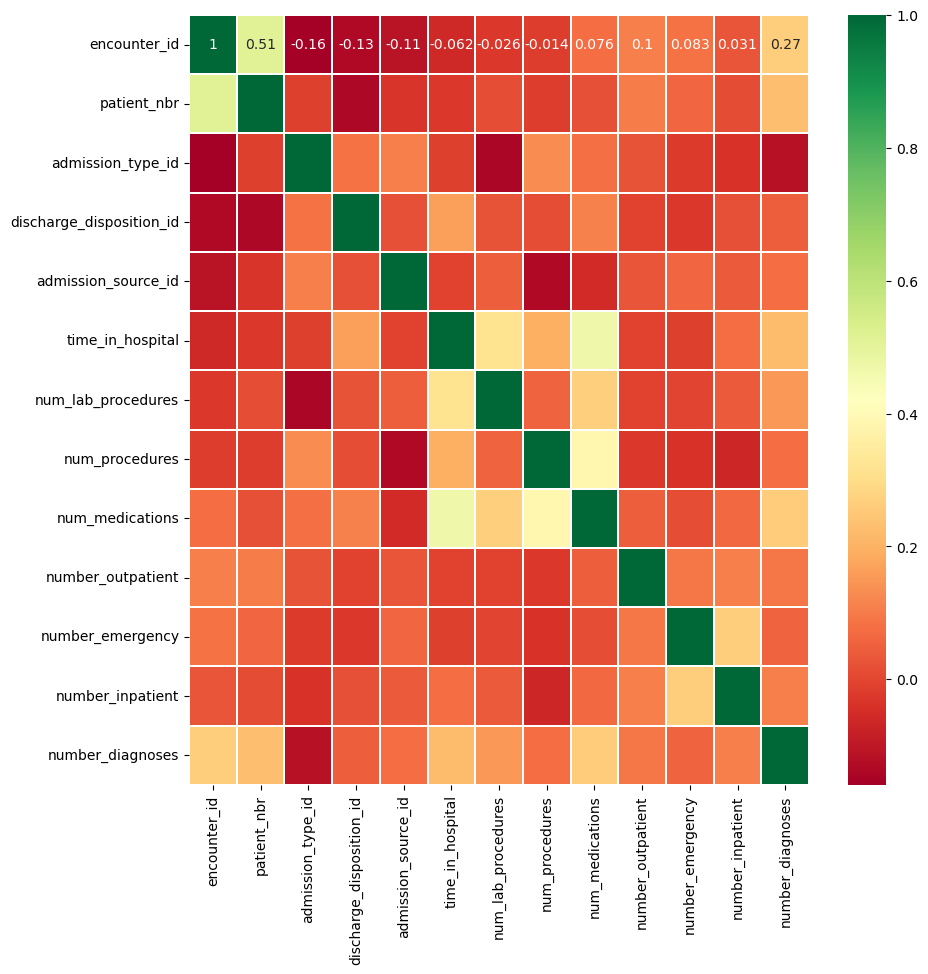



Null Values in Dataset:


encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 



Duplicate Rows in Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [ ]:
DatasetInfo(df)

## Data Cleaning

#### Change age range into two columns min_age and max_age

In [ ]:
df[['min_age', 'max_age']] = df['age'].str.extract(r'\[([\d]+)-([\d]+)\)')

### Handling missing values in the dataset

weight, max_glu_serum and A1Cresult has more than 80% missing values so removing those columns

examide and citoglipton has only unique value and is not providing any information so removing that as well

Payer code also have high missing values and it would not contribute for the outcome so removing that as well

'medical_specialty' has almost 50% of its value missing, therefore dropping the column

In [ ]:
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)

#### Checking Unknown entries or gender column

In [ ]:
df[df['gender']=='Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,min_age,max_age
30506,98634858,100695042,Other,Unknown/Invalid,[70-80),3,1,1,1,5,5,22,0,0,0,414,411,401,4,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,70,80
75551,226864668,60524946,?,Unknown/Invalid,[60-70),1,1,7,1,38,1,6,0,0,0,808,873,E813,5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,60,70
82573,257364294,78119847,?,Unknown/Invalid,[70-80),1,22,7,8,59,2,21,0,0,0,850,805,808,9,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,70,80


There are only 3 entries in the dataset which has gender as Unknown/Invalid.We will remove these rows.

Removing Unknown entries in gender column

In [ ]:
df.drop(index=[30506, 75551, 82573],inplace=True)

Checking the same for diag1, diag2 and diag3

In [ ]:
df[df['diag_1'] == '?']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,min_age,max_age
518,4342662,1355697,Caucasian,Male,[60-70),6,25,1,4,48,1,13,0,0,0,?,780,997,4,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,60,70
1006,7599132,9946782,?,Male,[80-90),3,3,5,3,34,1,9,0,0,0,?,595,250.6,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30,80,90
1267,8927178,520452,Caucasian,Male,[60-70),3,1,1,3,42,1,18,0,0,0,?,250.82,401,5,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,60,70
1488,10122996,3650130,AfricanAmerican,Male,[60-70),3,1,1,5,31,2,25,0,0,0,?,276,594,8,Steady,No,No,No,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,60,70
3197,20095914,916947,AfricanAmerican,Male,[70-80),3,5,1,1,12,2,10,0,0,0,?,250.01,428,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,70,80
7845,36370146,18328716,?,Male,[50-60),3,5,1,1,20,1,9,0,0,1,?,496,788,4,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,50,60
14503,56481816,4232736,AfricanAmerican,Female,[20-30),1,18,7,6,56,0,20,0,0,3,?,276,250.01,6,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,20,30
19714,70017684,104694696,Caucasian,Male,[60-70),1,1,7,4,74,2,24,1,1,2,?,112,585,8,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,60,70
32514,103561398,23460408,Caucasian,Male,[50-60),1,1,17,4,18,1,9,0,1,1,?,998,427,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,50,60
37693,117010956,25300467,Hispanic,Male,[40-50),1,2,1,4,31,0,20,0,0,3,?,780,295,9,Steady,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30,40,50


In [ ]:
len(df[df['diag_1']=='?'])

21

In [ ]:
len(df[df['diag_2']=='?'])

358

In [ ]:
len(df[df['diag_3']=='?'])

1423

We will work on diag_1, diag_2 and diag_3 afterwards.

#### Handling missing values in race column

In [ ]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

Checking if the missing values are MCAR or MAR

Replacing '?' with na in race column

In [ ]:
df['race'].replace('?', pd.NA, inplace=True)

Lets check the category of Missing value in race.Firstly based on gender

In [ ]:
# checking ratio of not null with total males for if it is MCAR OR MAR
df[(df['race'].isnull()) & (df['gender'] == 'Male')].shape[0]/df[ (df['gender'] == 'Male')].shape[0]

0.024184464987780256

In [ ]:
df[(df['race'].isnull()) & (df['gender'] == 'Female')].shape[0]/df[ (df['gender'] == 'Female')].shape[0]

0.020709951012648973

Wrt gender it looks like MCAR.Lets check for some other column.Lets check wrt target variable

In [ ]:
df[(df['race'].isnull()) & (df['readmitted'] == 'NO')].shape[0]/df[ (df['readmitted'] == 'NO')].shape[0]

0.028162082353584514

In [ ]:
df[(df['race'].isnull()) & (df['readmitted'] == '>30')].shape[0]/df[ (df['readmitted'] == '>30')].shape[0]

0.01513574342382895

In [ ]:
df[(df['race'].isnull()) & (df['readmitted'] == '<30')].shape[0]/df[ (df['readmitted'] == '<30')].shape[0]

0.016553667341727567

Now we are getting different values when we check for MCAR wrt target variable. So we will conclude it is an example of MAR

#### Imputing Missing values in race column

In [ ]:
df.loc[df['race'].isnull()==False,'Missing']=0
df.loc[df['race'].isnull()==True,'Missing']=1

In [ ]:
df['Missing'].unique()

array([0., 1.])

Encoding target variable('readmitted') as:
'No' : 0
'>30' : 0
'<30': 1


In [ ]:
# df.loc[df['readmitted']=='NO','readmitted']=0
# df.loc[df['readmitted']=='<30','readmitted']=1
# df.loc[df['readmitted']=='>30','readmitted']=2
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

Encoding gender
Male: 1
Female: 2

In [ ]:
df.loc[df['gender']=='Male','gender']=1
df.loc[df['gender']=='Female','gender']=2

In [ ]:
df['gender'] = df['gender'].astype(int)
df['readmitted'] = df['readmitted'].astype(int)

In [ ]:
X=df[['time_in_hospital']]
X = add_constant(X)

y=df['Missing']

logit = sml.Logit(y, X).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.106908
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Missing   No. Observations:               101763
Model:                          Logit   Df Residuals:                   101761
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:               0.0001383
Time:                        16:54:32   Log-Likelihood:                -10879.
converged:                       True   LL-Null:                       -10881.
Covariance Type:            nonrobust   LLR p-value:                   0.08280
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.7256      0.038    -98.863      0.000      -3.799      -3.652
time_in_hos

Since R sqaured value is too less  It would be ok to impute values since missing values are not correlated.

In [ ]:
df.reset_index(inplace=True)

Now we will Impute the Values for Race using KNN Imputation.
There are two types of imputation methods:
1. Iterative
2. KNN Imputation


In [ ]:
race_encoded = pd.get_dummies(df['race'], prefix='race')
# Create an imputer instance to handle missing values
imputer = KNNImputer()

# Fit the imputer on the encoded data and transform it
race_encoded_imputed = imputer.fit_transform(race_encoded)

# Convert the imputed numerical values back to DataFrame
race_encoded_imputed_df = pd.DataFrame(race_encoded_imputed, columns=race_encoded.columns)

# Convert numerical values back to categorical
race_categorical = race_encoded_imputed_df.idxmax(axis=1).str.replace('race_', '')

# Replace the original 'race' column with the imputed categorical values
df['race'] = race_categorical

In [ ]:
print(race_encoded_imputed)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
df[df['encounter_id']=='']

,index,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,min_age,max_age,Missing


In [ ]:
df['race'].head()

0          Caucasian
1          Caucasian
2    AfricanAmerican
3          Caucasian
4          Caucasian
Name: race, dtype: object

#### Handling missing values for diag1,diag2 and diag3

In [ ]:
df['diag_1'].replace('?', pd.NA, inplace=True)


In [ ]:
df['diag_2'].replace('?', pd.NA, inplace=True)
df['diag_3'].replace('?', pd.NA, inplace=True)

Checking if the missing values are MCAR or MAR

Lets check the category of Missing value in diag_1.Firstly based on gender

In [ ]:
# checking ratio of not null with total males for if it is MCAR OR MAR
print(df[(df['diag_1'].isnull()) & (df['gender'] == 1)].shape[0]/df[ (df['gender'] == 1)].shape[0])
print(df[(df['diag_1'].isnull()) & (df['gender'] == 2)].shape[0]/df[ (df['gender'] == 2)].shape[0])

0.00034002762724471365
9.13943116180449e-05


In [ ]:
# checking ratio of not null with total males for if it is MCAR OR MAR
print(df[(df['diag_2'].isnull()) & (df['gender'] == 1)].shape[0]/df[ (df['gender'] == 1)].shape[0])
print(df[(df['diag_2'].isnull()) & (df['gender'] == 2)].shape[0]/df[ (df['gender'] == 2)].shape[0])

0.0037828073530974393
0.003290195218249616


In [ ]:
# checking ratio of not null with total males for if it is MCAR OR MAR
print(df[(df['diag_3'].isnull()) & (df['gender'] == 1)].shape[0]/df[ (df['gender'] == 1)].shape[0])
print(df[(df['diag_3'].isnull()) & (df['gender'] == 2)].shape[0]/df[ (df['gender'] == 2)].shape[0])

0.014536181064711507
0.013508079257147036


Wrt gender it looks like MAR.Lets check for some other column.Lets check wrt target variable

In [ ]:
print(df[(df['diag_1'].isnull()) & (df['readmitted'] == 0)].shape[0]/df[ (df['readmitted'] == 0)].shape[0])
print(df[(df['diag_1'].isnull()) & (df['readmitted'] == 1)].shape[0]/df[ (df['readmitted'] == 1)].shape[0])
# print(df[(df['diag_1'].isnull()) & (df['readmitted'] == 2)].shape[0]/df[ (df['readmitted'] == 2)].shape[0])

0.00017697940402185695
0.000440257110152329


In [ ]:
print(df[(df['diag_2'].isnull()) & (df['readmitted'] == 0)].shape[0]/df[ (df['readmitted'] == 0)].shape[0])
print(df[(df['diag_2'].isnull()) & (df['readmitted'] == 1)].shape[0]/df[ (df['readmitted'] == 1)].shape[0])
# print(df[(df['diag_2'].isnull()) & (df['readmitted'] == 2)].shape[0]/df[ (df['readmitted'] == 2)].shape[0])

0.003639138995199434
0.0025534912388835078


In [ ]:
print(df[(df['diag_3'].isnull()) & (df['readmitted'] == 0)].shape[0]/df[ (df['readmitted'] == 0)].shape[0])
print(df[(df['diag_3'].isnull()) & (df['readmitted'] == 1)].shape[0]/df[ (df['readmitted'] == 1)].shape[0])
# print(df[(df['diag_3'].isnull()) & (df['readmitted'] == 2)].shape[0]/df[ (df['readmitted'] == 2)].shape[0])

0.014733535384819592
0.008012679404772387


So we will conclude it is an example of MAR

#### Imputing Missing values in diag1,diag2 and diag3 column

all three diag features have more than 700 unqie we are grouping them based on ICD-9 codes

In [ ]:
df['diag_1'].replace(pd.NA, '?', inplace=True)
df['diag_2'].replace(pd.NA, '?', inplace=True)
df['diag_3'].replace(pd.NA, '?', inplace=True)

In [ ]:

diag1_list=[]
diag2_list=[]
diag3_list=[]

#### Replacing Diagnosis 1,2,3 code ranges with the appropriate chapters that has same type of diseases according to https://icd.codes/icd9cm

In [ ]:
# This function, diag_cluster, takes a column 'col' and a list 'diag_list' as inputs.
# It iterates through each value in the 'col' column of the DataFrame 'df' and assigns a cluster value based on certain conditions.
# The resulting cluster values are appended to the 'diag_list'.

def diag_cluster(col, diag_list):
    for x in df[col]:
        # If the value in the 'col' column contains 'V' or 'E', it is assigned a cluster value of 18.
        if '?' in x in x:
            diag_list.append(0)
        elif 'V' in x in x:
            diag_list.append(18)
        elif 'E' in x in x:
            diag_list.append(19)
        # The following conditions assign cluster values based on specific ranges of float values.
        else:

            if 1 <= float(x) <= 139:
              diag_list.append(1)
            elif 140 <= float(x) <= 239:
              diag_list.append(2)
            elif 240 <= float(x) <= 279:
              diag_list.append(3)
            elif 280 <= float(x) <= 289:
                diag_list.append(4)
            elif 290 <= float(x) <= 319:
                diag_list.append(5)
            elif 320 <= float(x) <= 389:
                diag_list.append(6)
            elif 390 <= float(x) <= 459:
                diag_list.append(7)
            elif 460 <= float(x) <= 519:
                diag_list.append(8)
            elif 520 <= float(x) <= 579:
                diag_list.append(9)
            elif 580 <= float(x) <= 629:
                diag_list.append(10)
            elif 630 <= float(x) <= 679:
                diag_list.append(11)
            elif 680 <= float(x) <= 709:
                diag_list.append(12)
            elif 710 <= float(x) <= 739:
                diag_list.append(13)
            elif 740 <= float(x) <= 759:
                diag_list.append(14)
            elif 760 <= float(x) <= 779:
                diag_list.append(15)
            elif 780 <= float(x) <= 799:
                diag_list.append(16)
            elif 800 <= float(x) <= 999:
                diag_list.append(17)

In [ ]:
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)

In [ ]:
len(df['diag_1'])

101763

In [ ]:
len(diag1_list)

101763

In [ ]:
df['diag_1']=diag1_list
df['diag_2']=diag2_list
df['diag_3']=diag3_list

In [ ]:
df['diag_3'].unique()

array([ 0,  3, 18,  7,  1,  8, 17,  2, 10, 13, 16,  9, 12,  5, 14, 19,  6,
       11,  4], dtype=int64)

In [ ]:
df['diag_1'].replace(0, pd.NA, inplace=True)
df['diag_2'].replace(0, pd.NA, inplace=True)
df['diag_3'].replace(0, pd.NA, inplace=True)

In [ ]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [ ]:
df.loc[df['diag_1'].isnull()==False,'Missing']=0
df.loc[df['diag_1'].isnull()==True,'Missing']=1

In [ ]:
df['Missing'].unique()

array([0., 1.])

In [ ]:
X=df[['readmitted']]
X = add_constant(X)

y=df['Missing']

logit = sml.Logit(y, X).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.001944
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                Missing   No. Observations:               101763
Model:                          Logit   Df Residuals:                   101761
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                0.006684
Time:                        16:54:34   Log-Likelihood:                -197.87
converged:                       True   LL-Null:                       -199.20
Covariance Type:            nonrobust   LLR p-value:                    0.1027
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6393      0.250    -34.554      0.000      -9.129      -8.149
readmitted     0.9116      0

Since R sqaured value is too less  It would be ok to impute values since missing values are not correlated.

Now we will Impute the Values for diag_1, diag_2 and diag_3 using KNN Imputation

In [ ]:
def diag_imputer(col):
  diag_encoded = pd.get_dummies(df[col], prefix=col)
  # Create an imputer instance to handle missing values
  imputer = KNNImputer()

  # Fit the imputer on the encoded data and transform it
  diag_encoded_imputed = imputer.fit_transform(diag_encoded)

  # Convert the imputed numerical values back to DataFrame
  diag_encoded_imputed_df = pd.DataFrame(diag_encoded_imputed, columns=diag_encoded.columns)

  # Convert numerical values back to categorical
  diag_categorical = diag_encoded_imputed_df.idxmax(axis=1).str.replace(f'{col}_', '')

  # Replace the original 'race' column with the imputed categorical values
  df[col] = diag_categorical


In [ ]:
diag_imputer('diag_1')
diag_imputer('diag_2')
diag_imputer('diag_3')

In [ ]:
df['diag_1'] = df['diag_1'].astype(int)
df['diag_2'] = df['diag_2'].astype(int)
df['diag_3'] = df['diag_3'].astype(int)

In [ ]:
df.head()

,index,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,min_age,max_age,Missing
0,0,2278392,8222157,Caucasian,2,[0-10),6,25,1,1,41,0,1,0,0,0,3,1,1,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,10,0.0
1,1,149190,55629189,Caucasian,2,[10-20),1,1,7,3,59,0,18,0,0,0,3,3,3,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,0,10,20,0.0
2,2,64410,86047875,AfricanAmerican,2,[20-30),1,1,7,2,11,5,13,2,0,1,11,3,18,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,20,30,0.0
3,3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,1,3,7,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,0,30,40,0.0
4,4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,2,2,3,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes,0,40,50,0.0


### Feature Engineering

Encoding Age values

In [ ]:
# This function, replace_age_ranges, takes a feature (presumably containing age ranges) as input and 'values' represents corresponding numerical values assigned to each age range.

def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

  # The function iterates through the age_ranges and replaces each occurrence in the 'feature' with the corresponding numerical value.
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature

In [ ]:
df['age']=replace_age_ranges(df['age'])

admission_type_id,description 1,Emergency 2,Urgent 3,Elective 4,Newborn 5,Not Available 6,NULL 7,Trauma Center 8,Not Mapped , discharge_disposition_id,description 1,Discharged to home 2,Discharged/transferred to another short term hospital 3,Discharged/transferred to SNF 4,Discharged/transferred to ICF 5,Discharged/transferred to another type of inpatient care institution 6,Discharged/transferred to home with home health service 7,Left AMA 8,Discharged/transferred to home under care of Home IV provider 9,Admitted as an inpatient to this hospital 10,Neonate discharged to another hospital for neonatal aftercare 11,Expired 12,Still patient or expected to return for outpatient services 13,Hospice / home 14,Hospice / medical facility 15,Discharged/transferred within this institution to Medicare approved swing bed 16,Discharged/transferred/referred another institution for outpatient services 17,Discharged/transferred/referred to this institution for outpatient services 18,NULL 19,"Expired at home. Medicaid only, hospice." 20,"Expired in a medical facility. Medicaid only, hospice." 21,"Expired, place unknown. Medicaid only, hospice." 22,Discharged/transferred to another rehab fac including rehab units of a hospital . 23,Discharged/transferred to a long term care hospital. 24,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare. 25,Not Mapped 26,Unknown/Invalid 30,Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere 27,Discharged/transferred to a federal health care facility. 28,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital 29,Discharged/transferred to a Critical Access Hospital (CAH). , admission_source_id,description 1, Physician Referral 2,Clinic Referral 3,HMO Referral 4,Transfer from a hospital 5, Transfer from a Skilled Nursing Facility (SNF) 6, Transfer from another health care facility 7, Emergency Room 8, Court/Law Enforcement 9, Not Available 10, Transfer from critial access hospital 11,Normal Delivery 12, Premature Delivery 13, Sick Baby 14, Extramural Birth 15,Not Available 17,NULL 18, Transfer From Another Home Health Agency 19,Readmission to Same Home Health Agency 20, Not Mapped 21,Unknown/Invalid 22, Transfer from hospital inpt/same fac reslt in a sep claim 23, Born inside this hospital 24, Born outside this hospital 25, Transfer from Ambulatory Surgery Center 26,Transfer from Hospice

#### Grouping same things together

Based on the above mapping we have clusterd admission_type_id, discharge_disposition_id, admission_source_id that belong from simillar groups that helps in dimension reduction.

In [ ]:
#code to add data of code into data folder for the code mapping
# import pandas as pd

# # Define the data
# d1 = {
#     'Chapter': list(range(1, 20)),
#     'Code Range': ['001-139', '140-239', '240-279', '280-289', '290-319',
#                    '320-389', '390-459', '460-519', '520-579', '580-629',
#                    '630-679', '680-709', '710-739', '740-759', '760-779',
#                    '780-799', '800-999', 'V01-V91', 'E000-E999'],
#     'Description': ['Infectious And Parasitic Diseases', 'Neoplasms',
#                     'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
#                     'Diseases Of The Blood And Blood-Forming Organs', 'Mental Disorders',
#                     'Diseases Of The Nervous System And Sense Organs', 'Diseases Of The Circulatory System',
#                     'Diseases Of The Respiratory System', 'Diseases Of The Digestive System',
#                     'Diseases Of The Genitourinary System', 'Complications Of Pregnancy, Childbirth, And The Puerperium',
#                     'Diseases Of The Skin And Subcutaneous Tissue', 'Diseases Of The Musculoskeletal System And Connective Tissue',
#                     'Congenital Anomalies', 'Certain Conditions Originating In The Perinatal Period',
#                     'Symptoms, Signs, And Ill-Defined Conditions', 'Injury And Poisoning',
#                     'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services',
#                     'Supplementary Classification Of External Causes Of Injury And Poisoning']
# }

# # Create DataFrame
# d2 = pd.DataFrame(d1)
# print(d2)

# file_path = '/content/drive/MyDrive/CA683: Data Analytics and Data Mining/Assignment/Dataset/chapter_code_range_description.csv'

# # Save DataFrame to CSV
# d2.to_csv(file_path, index=False)

# print("DataFrame saved to CSV successfully.")

In [ ]:
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

Discharged Home: 1, 6, 8

In [ ]:
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

Uncategorized/Unknown: 18, 25, 26, 12

In [ ]:
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

Hospice:13, 14

In [ ]:
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29

In [ ]:
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24

In [ ]:
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

Discharged to Outpatient Services:16, 17

In [ ]:
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)

Unknown/Invalid: 9, 15, 17, 20, 21

In [ ]:
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

Physician/Clinic Referral:1, 2, 3

In [ ]:
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

Transfer from Facility:5, 6, 18, 19, 25, 26

In [ ]:
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)

Delivery:11, 12, 13, 14

In [ ]:
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)

### Outlier detection

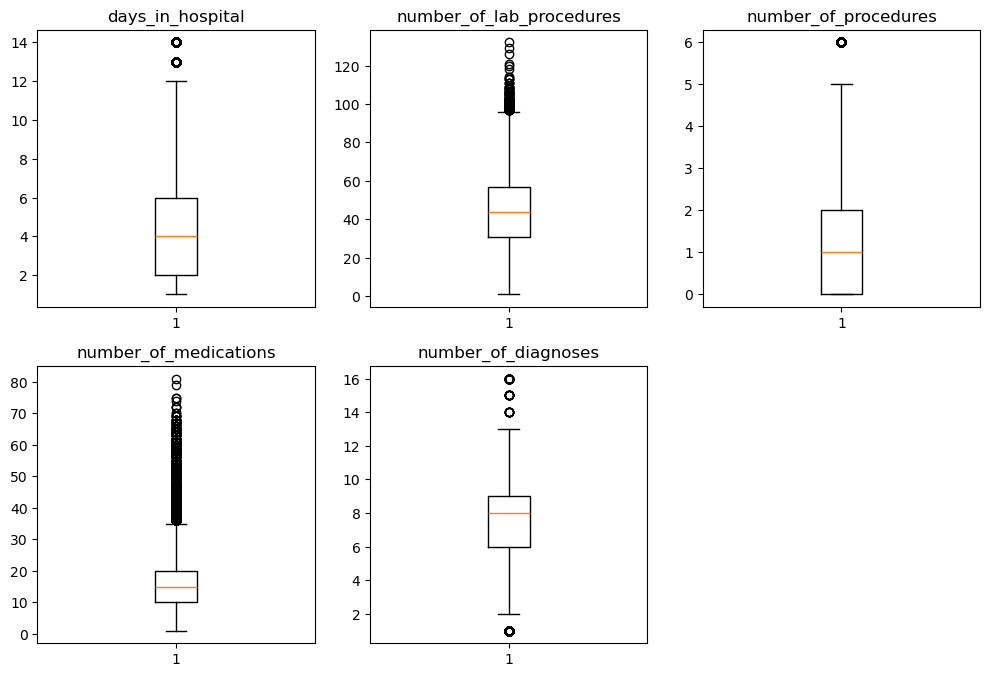

In [ ]:
plt.figure(figsize=(10, 10))
# Graph 1
plt.subplot(3, 3, 1)
plt.boxplot(df['time_in_hospital'])
plt.title('days_in_hospital')

# Graph 2
plt.subplot(3, 3, 2)
plt.boxplot(df['num_lab_procedures'])
plt.title('number_of_lab_procedures')

# Graph 3
plt.subplot(3, 3, 3)
plt.boxplot(df['num_procedures'])
plt.title('number_of_procedures')

# Graph 4
plt.subplot(3, 3, 4)
plt.boxplot(df['num_medications'])
plt.title('number_of_medications')

# Graph 5
plt.subplot(3, 3, 5)
plt.boxplot(df['number_diagnoses'])
plt.title('number_of_diagnoses')

# Adjust layout
plt.tight_layout()

plt.show()


### Encoding Categorical Features

In [ ]:
df['chlorpropamide'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

#### Converting Categorical to Numerical

Converting Categorical to Numerical values for below column


'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'

In [ ]:
medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [ ]:
df['metformin'].head(1)

0    No
Name: metformin, dtype: object

In [ ]:
value_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}

for col in medicines:
    df[col] = df[col].replace(value_mapping)

Encoding change and diabeted medicine column to No(0) and Yes(1)

In [ ]:
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [ ]:
df['readmitted'].unique()

array([0, 1])

In [ ]:
df[df.duplicated('patient_nbr', keep=False)]

,index,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,min_age,max_age,Missing
12,12,40926,85504905,Caucasian,2,5,1,3,7,7,60,0,15,0,1,0,7,3,3,8,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1,40,50,0.0
27,27,248916,115196778,Caucasian,2,6,1,1,1,2,25,2,11,0,0,0,17,10,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,50,60,0.0
28,28,250872,41606064,Caucasian,1,3,2,1,1,10,53,0,20,0,0,0,3,3,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,20,30,0.0
32,32,260166,80845353,Caucasian,2,8,1,1,7,6,27,0,16,0,0,0,17,17,3,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,70,80,0.0
33,33,293058,114715242,Caucasian,1,7,2,1,1,5,37,0,18,0,0,0,8,17,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,60,70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,101760,443847176,50375628,AfricanAmerican,2,7,1,1,7,6,45,1,25,3,1,2,6,7,7,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,1,0,60,70,0.0
101758,101761,443847548,100162476,AfricanAmerican,1,8,1,3,7,3,51,0,16,0,0,0,3,5,7,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,70,80,0.0
101759,101762,443847782,74694222,AfricanAmerican,2,9,1,3,5,5,33,3,18,0,0,1,9,3,16,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,90,0.0
101760,101763,443854148,41088789,Caucasian,1,8,1,1,7,1,53,0,9,1,0,0,1,10,5,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,70,80,0.0


In [ ]:
df[df['patient_nbr']==85504905]

,index,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,min_age,max_age,Missing
12,12,40926,85504905,Caucasian,2,5,1,3,7,7,60,0,15,0,1,0,7,3,3,8,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1,40,50,0.0
22077,22077,76387002,85504905,Caucasian,2,5,1,1,7,9,46,1,14,0,0,0,13,3,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,40,50,0.0


Even though there are duplicate entries for patient number , we wont delete the duplicate entries since it can happen that one patient came multiple times. But what we can do is to not consider patient_nbr as a feature to make our model more generalized

Removing patient_nbr and encounter_id columns from dataset

In [ ]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

#### used label encoder for race feature.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

In [ ]:
df['race'].unique()

array([2, 0, 4, 1, 3])

In [ ]:
## inpatient - total count of times patient was admitted to a hospital
## emergency - total count of visits a patient made to an emergency department
## outpatient - total count of times patient visited hospital without being admitted, that is they came and left the same day
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:
df.head().T

,0,1,2,3,4
index,0,1,2,3,4
race,2,2,0,2,2
gender,2,2,2,1,1
age,1,2,3,4,5
admission_type_id,5,1,1,1,1
discharge_disposition_id,18,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0


In [ ]:
X=df[['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'glimepiride',
       'service_utilization', 'gender', 'repaglinide' ,
      'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide',
      'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin',
      'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
      'metformin-pioglitazone']]
y=df['readmitted']

In [ ]:
logit = sml.Logit(y, X).fit()
print(logit.summary())

         Current function value: 0.347757
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:               101763
Model:                          Logit   Df Residuals:                   101725
Method:                           MLE   Df Model:                           37
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                0.005989
Time:                        16:54:40   Log-Likelihood:                -35389.
converged:                      False   LL-Null:                       -35602.
Covariance Type:            nonrobust   LLR p-value:                 1.052e-67
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
num_lab_procedures          -0.0056      0.001    -10.343      0.000      -0.007      -0.005
num_medications        

C:\Users\shikh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
X=df[['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed',
       'metformin', 'glipizide','service_utilization', 'gender',
      'repaglinide']]
y = df[['readmitted']]

In [ ]:
!pip install optuna

In [ ]:
scoring = {'roc_auc': 'roc_auc',
           'f1_macro': make_scorer(f1_score, average='macro'),
           'accuracy': 'accuracy'}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model Training

##### Logistic Regression

Model Training without SMOTE

In [ ]:
numerical_cols = ['num_lab_procedures', 'num_medications', 'time_in_hospital',
                  'number_diagnoses', 'num_procedures', 'service_utilization']
categorical_cols = ['diag_3', 'diag_1', 'age', 'diag_2', 'admission_source_id',
                    'race', 'admission_type_id', 'discharge_disposition_id',
                    'insulin', 'diabetesMed', 'metformin', 'glipizide', 'gender',
                    'repaglinide']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=kf, scoring='roc_auc', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'C': 0.1}
Best ROC AUC score: 0.6261554679856965


In [ ]:


# Creating a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C = 0.1, solver='lbfgs', max_iter=1000))
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")

Mean ROC_AUC: 0.6524608551794715
Mean Macro F1: 0.47473930429506267
Mean Accuracy: 0.8874542257612262


Model Training with SMOTE

In [ ]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)),
    ('classifier', LogisticRegression(C = 0.1,solver='lbfgs', max_iter=1000))
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")

Mean ROC_AUC: 0.6373772672418491
Mean Macro F1: 0.5005485568212851
Mean Accuracy: 0.6265636525158005


##### Support Vector Machine

In [ ]:
from tqdm import tqdm

svc_model = SVC()
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=kf, scoring='roc_auc')

# Get the total number of combinations for tqdm
total_combinations = len(param_grid['C']) * len(param_grid['kernel'])

# Initialize tqdm to monitor progress
with tqdm(total=total_combinations, desc='Grid Search Progress') as pbar:
    # Perform the grid search
    grid_search.fit(X, y)
    # Update tqdm after each combination
    pbar.update()

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Grid Search Progress:   0%|                                                                      | 0/6 [00:00<?, ?it/s]

In [ ]:
# Creating a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")


With SMOTE

In [ ]:
## 17:02 start time
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)),
     ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")

###Applying XGBoost with SMOTE

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'gamma':[0.1,0.2,0.3]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='roc_auc')

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.6682903278842472


In [ ]:
model = xgb.XGBClassifier(n_estimators=100,
                                     max_depth=8,
                                     learning_rate=0.1,
                                    gamma=0.1,
                                    colsample_bytree=0.8,
                          subsample=0.8)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")

Mean ROC_AUC: 0.6668648365597669
Mean Macro F1: 0.48490695698391717
Mean Accuracy: 0.8887808356640514


In [ ]:
model = xgb.XGBClassifier(n_estimators=300,
                                     max_depth=10,
                                     learning_rate=0.1,
                                    gamma=0.2,
                                    colsample_bytree=0.8)
# {'classifier__subsample': 0.8, 'classifier__n_estimators': 300, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.1, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 1.0}
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)),
     ('classifier', model)
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")

Mean ROC_AUC: 0.661604520663887
Mean Macro F1: 0.488327278265748
Mean Accuracy: 0.8889184133147431


### CatBoostClassifier

In [ ]:
catboost_model = CatBoostClassifier(verbose=0, thread_count=-1)

# Define the parameter grid to search over
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=kf, scoring='roc_auc')

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'depth': 10, 'iterations': 100, 'learning_rate': 0.05}
Best score: 0.6662347657525267


In [ ]:
model = CatBoostClassifier(iterations=300,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='Logloss',
                                    verbose=True)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")


0:	learn: 0.6178532	total: 22.5ms	remaining: 6.74s
1:	learn: 0.5556414	total: 44ms	remaining: 6.55s
2:	learn: 0.5092389	total: 64.6ms	remaining: 6.39s
3:	learn: 0.4739536	total: 86.1ms	remaining: 6.37s
4:	learn: 0.4465235	total: 108ms	remaining: 6.37s
5:	learn: 0.4241143	total: 129ms	remaining: 6.33s
6:	learn: 0.4064111	total: 151ms	remaining: 6.33s
7:	learn: 0.3920375	total: 171ms	remaining: 6.25s
8:	learn: 0.3809853	total: 191ms	remaining: 6.19s
9:	learn: 0.3728251	total: 209ms	remaining: 6.06s
10:	learn: 0.3650329	total: 229ms	remaining: 6.02s
11:	learn: 0.3597676	total: 250ms	remaining: 6s
12:	learn: 0.3554169	total: 273ms	remaining: 6.03s
13:	learn: 0.3518449	total: 294ms	remaining: 6.01s
14:	learn: 0.3487340	total: 316ms	remaining: 6s
15:	learn: 0.3460317	total: 335ms	remaining: 5.95s
16:	learn: 0.3440893	total: 356ms	remaining: 5.92s
17:	learn: 0.3425641	total: 376ms	remaining: 5.88s
18:	learn: 0.3412816	total: 397ms	remaining: 5.87s
19:	learn: 0.3402000	total: 417ms	remaining: 

In [ ]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)),
     ('classifier', CatBoostClassifier(iterations=300,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='Logloss',
                                    verbose=True))
])

scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
roc_auc_mean = sum(scores['test_roc_auc']) / len(scores['test_roc_auc'])
macro_f1_mean = sum(scores['test_f1_macro']) / len(scores['test_f1_macro'])
accuracy_mean = sum(scores['test_accuracy']) / len(scores['test_accuracy'])

print(f"Mean ROC_AUC: {roc_auc_mean}")
print(f"Mean Macro F1: {macro_f1_mean}")
print(f"Mean Accuracy: {accuracy_mean}")

0:	learn: 0.6231520	total: 69.7ms	remaining: 20.9s
1:	learn: 0.5772512	total: 123ms	remaining: 18.4s
2:	learn: 0.5433467	total: 171ms	remaining: 16.9s
3:	learn: 0.5138157	total: 221ms	remaining: 16.4s
4:	learn: 0.4885051	total: 277ms	remaining: 16.4s
5:	learn: 0.4717558	total: 326ms	remaining: 16s
6:	learn: 0.4486467	total: 375ms	remaining: 15.7s
7:	learn: 0.4315833	total: 422ms	remaining: 15.4s
8:	learn: 0.4128361	total: 472ms	remaining: 15.3s
9:	learn: 0.3961728	total: 520ms	remaining: 15.1s
10:	learn: 0.3846805	total: 573ms	remaining: 15s
11:	learn: 0.3718617	total: 629ms	remaining: 15.1s
12:	learn: 0.3612178	total: 680ms	remaining: 15s
13:	learn: 0.3497043	total: 736ms	remaining: 15s
14:	learn: 0.3407875	total: 787ms	remaining: 14.9s
15:	learn: 0.3304186	total: 838ms	remaining: 14.9s
16:	learn: 0.3153290	total: 890ms	remaining: 14.8s
17:	learn: 0.3077628	total: 941ms	remaining: 14.7s
18:	learn: 0.3025455	total: 987ms	remaining: 14.6s
19:	learn: 0.2912732	total: 1.04s	remaining: 14.